# NBA WIN PREDICTOR

# CST 383 - FINAL PROJECT
 


**BY: Deen Altawil & Jordan Cruz**


#About:
In this project we aim to predict the outcome of NBA games, and determine any possible factors that could affect a teams outcome. The data is collected from the 2018-2019 NBA season and was provided by sports-reference.com.

#Goals:
*   Observe the outcome of winning based on whether a team won its' previous game
*   Determine whether offensive team rating or defensive team rating has a more positive affect on team outcomes
*   Use various models to determine which is better at predicting the outcome of a NBA game, i.e. predict the winners and losers

#Dataset:

**Name:** 
*   2018-2019 NBA Team Wins Per Game Stats & Misc team statistics

**Owner:**

sports-reference.com

**Source Link:**

[2018-2019 Season](https://www.basketball-reference.com/leagues/NBA_2019.html)

[2018-2019 Per Game Stats](https://www.basketball-reference.com/leagues/NBA_2019_games.html)

**Video link**

[Final Project Video](https://youtu.be/yWvCwfWzItg)

**Aquired:**

February 10, 2021 from [basketball-reference.com](https://www.basketball-reference.com/) 

# DATA  EXPLORATION:



In [ ]:
# Required packages
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import defaultdict
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

sns.set()

Upload dataset CSV files from drive.

In [ ]:
# Import files
from google.colab import files
uploaded = files.upload()

Saving NBA_2018_2019_Misc.csv to NBA_2018_2019_Misc (3).csv
Saving NBA_2018_2019_WinsLosses.csv to NBA_2018_2019_WinsLosses (3).csv


**INITIAL EXPLORATION:**

In [ ]:
# Read data
df_win_lose = pd.read_csv(io.BytesIO(uploaded['NBA_2018_2019_WinsLosses.csv']))
df_misc = pd.read_csv(io.BytesIO(uploaded['NBA_2018_2019_Misc.csv']))

In [ ]:
# Display contents of first DataFrames
df_win_lose

,Date,Visitor,V_PTS,Home,H_PTS
0,Tue Oct 16 2018,Philadelphia 76ers,87,Boston Celtics,105
1,Tue Oct 16 2018,Oklahoma City Thunder,100,Golden State Warriors,108
2,Wed Oct 17 2018,Milwaukee Bucks,113,Charlotte Hornets,112
3,Wed Oct 17 2018,Brooklyn Nets,100,Detroit Pistons,103
4,Wed Oct 17 2018,Memphis Grizzlies,83,Indiana Pacers,111
...,...,...,...,...,...
1307,Sun Jun 2 2019,Golden State Warriors,109,Toronto Raptors,104
1308,Wed Jun 5 2019,Toronto Raptors,123,Golden State Warriors,109
1309,Fri Jun 7 2019,Toronto Raptors,105,Golden State Warriors,92
1310,Mon Jun 10 2019,Golden State Warriors,106,Toronto Raptors,105


***DataFrame Facts:***


*   Rows - 1312
*   Columns - 5
*   Each row is a date on which NBA team played on another



In [ ]:
# Display contents of second DataFrame
df_misc

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1.0,Milwaukee Bucks*,26.9,60.0,22.0,61,21,8.87,-0.82,8.04,113.8,105.2,8.6,103.3,0.255,0.419,0.583,0.550,12.0,20.8,0.197,0.503,11.5,80.3,0.162,Fiserv Forum,721692,17602
1,2.0,Golden State Warriors*,28.4,57.0,25.0,56,26,6.46,-0.04,6.42,115.9,109.5,6.4,100.9,0.227,0.384,0.596,0.565,12.6,22.5,0.182,0.508,11.7,77.1,0.205,Oracle Arena,803436,19596
2,3.0,Toronto Raptors*,27.3,58.0,24.0,56,26,6.09,-0.60,5.49,113.1,107.1,6.0,100.2,0.247,0.379,0.579,0.543,12.4,21.9,0.198,0.509,13.1,77.1,0.190,Scotiabank Arena,812822,19825
3,4.0,Utah Jazz*,27.3,50.0,32.0,54,28,5.26,0.03,5.28,110.9,105.7,5.2,100.3,0.295,0.394,0.572,0.538,13.4,22.9,0.217,0.507,12.4,80.3,0.189,Vivint Smart Home Arena,750546,18306
4,5.0,Houston Rockets*,29.2,53.0,29.0,53,29,4.77,0.19,4.96,115.5,110.7,4.8,97.9,0.279,0.519,0.581,0.542,12.0,22.8,0.221,0.525,13.4,74.4,0.210,Toyota Center,740392,18058
5,6.0,Portland Trail Blazers*,26.2,53.0,29.0,51,31,4.20,0.24,4.43,114.7,110.5,4.2,99.1,0.258,0.339,0.568,0.528,12.1,26.6,0.210,0.516,11.0,77.9,0.195,Moda Center,799345,19496
6,7.0,Denver Nuggets*,24.9,54.0,28.0,51,31,3.95,0.24,4.19,113.0,108.9,4.1,97.7,0.232,0.348,0.558,0.527,11.9,26.6,0.175,0.521,12.3,78.0,0.194,Pepsi Center,756457,18450
7,8.0,Boston Celtics*,25.7,49.0,33.0,52,30,4.44,-0.54,3.90,112.2,107.8,4.4,99.6,0.215,0.381,0.567,0.534,11.5,21.6,0.173,0.514,13.4,77.0,0.198,TD Garden,763584,18624
8,9.0,Oklahoma City Thunder*,25.7,49.0,33.0,50,32,3.40,0.15,3.56,110.3,107.0,3.3,102.8,0.266,0.347,0.545,0.514,11.7,26.0,0.190,0.523,14.4,78.2,0.206,Chesapeake Energy Arena,746323,18203
9,10.0,Indiana Pacers*,27.0,48.0,34.0,50,32,3.33,-0.57,2.76,109.9,106.5,3.4,98.1,0.242,0.292,0.561,0.530,12.4,21.9,0.182,0.516,14.1,76.2,0.184,Bankers Life Fieldhouse,689310,16812


***DataFrame facts:***

*   Rows - 31
*   Columns - 28
*   Each row is a seperate NBA team







***Null Values & DataTypes:***

We will determine where there may be null values within our datasets and the what the datatypes are.

In [ ]:
df_win_lose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1312 non-null   object
 1   Visitor  1312 non-null   object
 2   V_PTS    1312 non-null   int64 
 3   Home     1312 non-null   object
 4   H_PTS    1312 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 51.4+ KB


From the looks of this, there does not seem to be any null values in this dataset for wins and losses for games played in the 2018 - 2019 NBA season.

*Datatypes:*


*   object (3)
*   int64 (2)




In [ ]:
df_misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         30 non-null     float64
 1   Team       31 non-null     object 
 2   Age        31 non-null     float64
 3   W          30 non-null     float64
 4   L          30 non-null     float64
 5   PW         31 non-null     int64  
 6   PL         31 non-null     int64  
 7   MOV        31 non-null     float64
 8   SOS        31 non-null     float64
 9   SRS        31 non-null     float64
 10  ORtg       31 non-null     float64
 11  DRtg       31 non-null     float64
 12  NRtg       30 non-null     float64
 13  Pace       31 non-null     float64
 14  FTr        31 non-null     float64
 15  3PAr       31 non-null     float64
 16  TS%        31 non-null     float64
 17  eFG%       31 non-null     float64
 18  TOV%       31 non-null     float64
 19  ORB%       31 non-null     float64
 20  FT/FGA     3

On the other hand, this dataset does seem to have at the most one null values in five different columns.

*Datatypes:*


*   object (2)
*   int64 (4)
*   float64 (22)



For one final overview, we will look at a summary of the data.

In [ ]:
# First dataset summary
df_win_lose.describe()

,V_PTS,H_PTS
count,1312.000000,1312.000000
mean,109.592988,112.385671
std,12.521306,12.653055
min,68.000000,77.000000
25%,101.000000,104.000000
50%,110.000000,112.000000
75%,118.000000,121.000000
max,168.000000,161.000000


In [ ]:
# Second dataset summary
df_misc.describe()

,Rk,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Attend.,Attend./G
count,30.000000,31.000000,30.000000,30.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.00000,31.000000,31.000000
mean,15.500000,26.280645,41.000000,41.000000,41.096774,40.903226,0.000968,-0.002903,-0.003226,110.400000,110.403226,-0.003333,100.035484,0.258774,0.358774,0.559581,0.524161,12.400000,22.887097,0.198290,0.52429,12.416129,77.070968,0.19829,732148.225806,17851.612903
std,8.803408,1.343731,12.028701,12.028701,11.452379,11.452379,4.804882,0.381743,4.625261,2.957476,2.893151,4.862984,2.095002,0.025231,0.047483,0.014809,0.014989,0.765071,1.834074,0.019905,0.01406,0.966470,1.733242,0.01730,66124.690768,1614.137596
min,1.000000,23.400000,17.000000,22.000000,19.000000,21.000000,-9.610000,-0.820000,-9.390000,104.500000,105.200000,-9.900000,96.600000,0.215000,0.286000,0.529000,0.490000,10.900000,19.400000,0.168000,0.50300,11.000000,72.500000,0.16200,612597.000000,14941.000000
25%,8.250000,25.550000,33.000000,32.250000,37.000000,31.500000,-1.610000,-0.320000,-1.325000,108.500000,108.450000,-1.650000,98.250000,0.243000,0.333000,0.551000,0.514000,11.950000,21.800000,0.183000,0.51400,11.600000,76.300000,0.18950,682940.000000,16657.000000
50%,15.500000,26.400000,41.500000,40.500000,41.000000,41.000000,-0.070000,0.100000,-0.400000,110.400000,110.400000,-0.150000,100.000000,0.257000,0.348000,0.556000,0.524000,12.400000,22.700000,0.197000,0.52200,12.300000,77.100000,0.19500,740392.000000,18058.000000
75%,22.750000,27.000000,49.750000,49.000000,50.500000,45.000000,3.675000,0.240000,3.730000,112.500000,112.550000,3.925000,101.500000,0.268500,0.382500,0.570000,0.531500,12.800000,24.300000,0.210000,0.53300,13.250000,77.950000,0.20600,786212.000000,19176.000000
max,30.000000,29.200000,60.000000,65.000000,61.000000,63.000000,8.870000,0.730000,8.040000,115.900000,117.600000,8.600000,103.900000,0.326000,0.519000,0.596000,0.565000,14.300000,26.600000,0.258000,0.56400,14.400000,80.300000,0.23700,838342.000000,20447.000000


**INITIAL PREPROCESSING AND CLEANING:**

Now we will discard any of the rows that we do not believe we will need at this point.

In [ ]:
df_misc.drop(columns=['Rk','Age','MOV','SOS','SRS','NRtg','FTr','3PAr','TS%','eFG%','TOV%','ORB%','FT/FGA','eFG%.1','TOV%.1','DRB%','FT/FGA.1','Arena','Attend.','Attend./G'])

,Team,W,L,PW,PL,ORtg,DRtg,Pace
0,Milwaukee Bucks*,60.0,22.0,61,21,113.8,105.2,103.3
1,Golden State Warriors*,57.0,25.0,56,26,115.9,109.5,100.9
2,Toronto Raptors*,58.0,24.0,56,26,113.1,107.1,100.2
3,Utah Jazz*,50.0,32.0,54,28,110.9,105.7,100.3
4,Houston Rockets*,53.0,29.0,53,29,115.5,110.7,97.9
5,Portland Trail Blazers*,53.0,29.0,51,31,114.7,110.5,99.1
6,Denver Nuggets*,54.0,28.0,51,31,113.0,108.9,97.7
7,Boston Celtics*,49.0,33.0,52,30,112.2,107.8,99.6
8,Oklahoma City Thunder*,49.0,33.0,50,32,110.3,107.0,102.8
9,Indiana Pacers*,48.0,34.0,50,32,109.9,106.5,98.1


**Data Fields**

*   *Date* - The day on which two NBA team played one another
*   *Visitor* - Visiting team, i.e. the opponents
*   *V_PTS* - Visiting team points
*   *Home* - Home team, i.e. the host team
*   *H_PTS* - Home team points
*   *Team* - NBA team name
*   *W* - Wins
*   *L* - Loses
*   *PW* - Predicted wins for the season 
*   *PL* - Predicted losses for the season
*   *ORtg* - Offensive team rating
*   *DRtg* - Defensive team rating
*   *Pace* - The amount of possessions per game (48 minutes)

# EXPLORATION & VISUALIZATION

***Barplot***

Used to visually represent the different datatypes used in each dataset

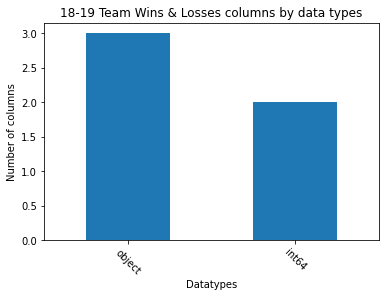

In [ ]:
# Win & Loss dataset
win_loss_barplot = df_win_lose.dtypes.value_counts().plot.bar()
plt.title("18-19 Team Wins & Losses columns by data types")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(win_loss_barplot)

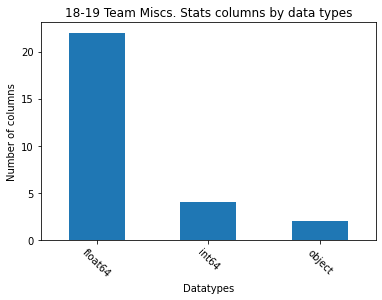

In [ ]:
# Misc stats dataset
misc_barplot = df_misc.dtypes.value_counts().plot.bar()
plt.title("18-19 Team Miscs. Stats columns by data types")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(win_loss_barplot)

**Formulas**

Below are some ways that the dataset produced various columns:

*   *PW & PL* - Predicted by comparing the teams average points scored and points allowed to opposing team
*   *ORtg* - Calculated by estimating the amount of points a single player or the entire team scores per 100 offensive possessions
*   *DRtg* - Calculated by estimating the amount of points allowed to opposing team per 100 defensive possessions

***Pairplot***

First used to analyze our Misc. Stats dataset:

Here we can see the relation between the wins/losses and the predicted wins/loses

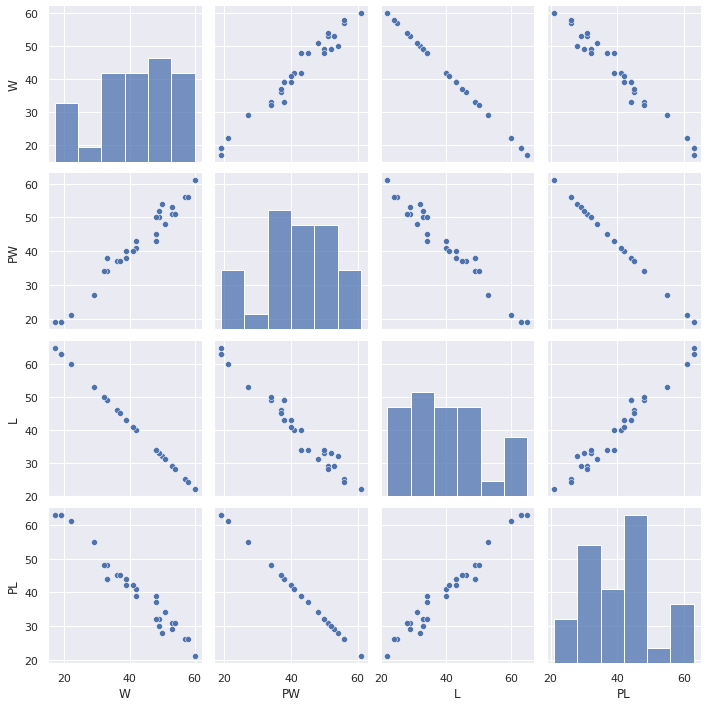

In [ ]:
sns.pairplot(
    df_misc,
    vars=['W','PW','L',"PL"]
    )

Here the pairlot reveals the direct relation between a teams offensive rating and their wins and loses.

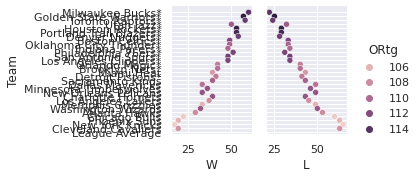

In [ ]:
sns.pairplot(df_misc,
             x_vars=['W','L'], 
             y_vars=['Team'],
             hue='ORtg')

The same is done here but we examine the relationship pertaining to a teams defensive rating.

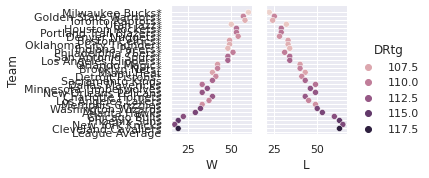

In [ ]:
sns.pairplot(df_misc,
             x_vars=['W','L'], 
             y_vars=['Team'],
             hue='DRtg')

***Scatterplots***

Scatterplots used to analysize where teams are regarding wins and losses

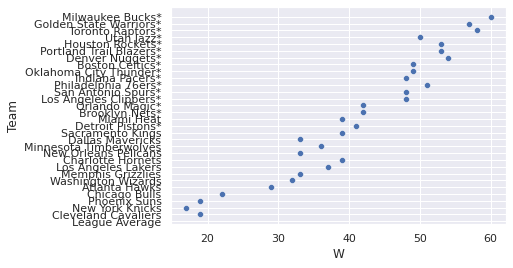

In [ ]:
# Scatterplot to display the teams and their wins achieved during 2018-2019 season
sns.scatterplot(data=df_misc,x='W',y='Team')

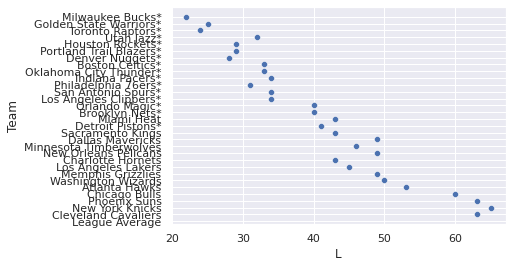

In [ ]:
# Scatterplot to display the teams and their losses during 2018-2019 season
sns.scatterplot(data=df_misc,x='L',y='Team')

When we combine both scatterplots, we can visually see where team wins and loses overlap. This can be interpreted as the teams that were evenly split between wins and losses, i.e. .500 teams.

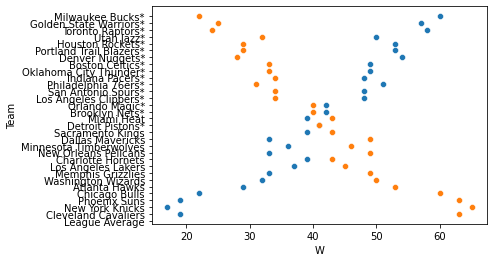

In [ ]:
# Represented by the orange scatter dots
sns.scatterplot(data=df_misc,x='W',y='Team')
# Represented by the blue scatter dots
sns.scatterplot(data=df_misc,x='L',y='Team')

To further analyze our pairplots, 'size' was applied to produce a more defined look at how successful a team was with a higher offensive rating.

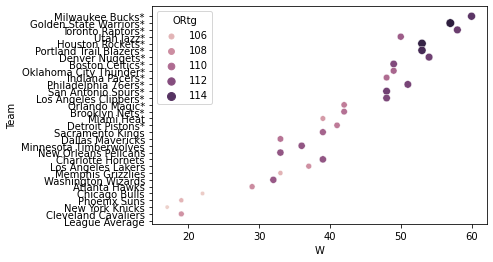

In [ ]:
sns.scatterplot(data=df_misc,x='W',y='Team',hue='ORtg',size='ORtg')

The same can be said for a teams defensive rating, as a lower defensive rating number resulted in a better team record.

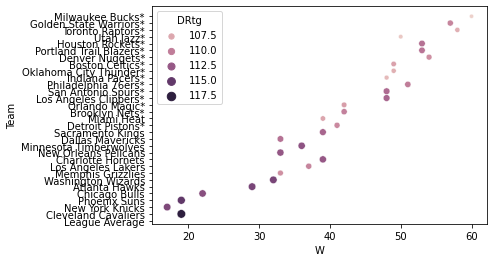

In [ ]:
sns.scatterplot(data=df_misc,x='W',y='Team',hue='DRtg',size='DRtg')

Now to analyze the Win & Loss dataset:

Below we calculate a new column to be used in a later part of this report.

In [ ]:
# Calculate whether the home team won or not and assign to new column "HomeWin"
df_win_lose["HomeWin"] = df_win_lose["V_PTS"] < df_win_lose["H_PTS"]

#Conver true/false to 1/0, respectively
df_win_lose['HomeWin'] = df_win_lose['HomeWin'].astype(int)

won_prev = defaultdict(int)

for index, row in df_win_lose.iterrows():
  home_team = row['Home']
  visitor_team = row['Visitor']
  row['HomeLastWin'] = won_prev[home_team]
  row['VisitorLastWin'] = won_prev[visitor_team]

# Determine whether the home team/visting team won their previous games
won_prev[home_team] = row['HomeWin']
won_prev[visitor_team] = not row['HomeWin']

These histograms give a small look into the relation between Home points and Vistor points and whether or not it resulted in a win or loss.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f715d76a110>,
      dtype=object)

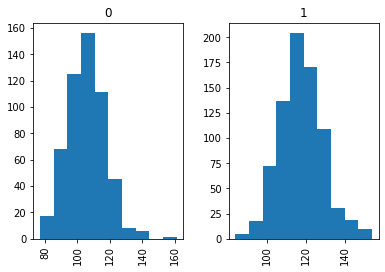

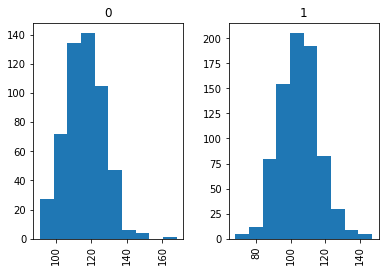

In [ ]:
df_win_lose.hist(by='HomeWin',
                 column='H_PTS')
df_win_lose.hist(by='HomeWin',
                 column='V_PTS')

Below we cannot really conclude anything other than that each team has won and loss at home. 

This still will be something we can use when predicting the outcomes of games.



Text(0.5, 1.0, 'Home wins by Home/Visitor')

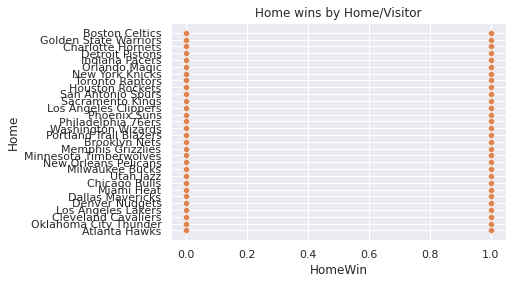

In [ ]:
sns.scatterplot(data=df_win_lose,x='HomeWin',y='Home')
sns.scatterplot(data=df_win_lose,x='HomeWin',y='Visitor')
plt.title('Home wins by Home/Visitor')

***Boxplot***

Here is a correlation between the home team points scored and whether or not the home team won.

The next boxplots is meant to show the correlation between the visitor team points and whether or not the home team won.

Text(0.5, 1.0, 'Home wins by home points scored')

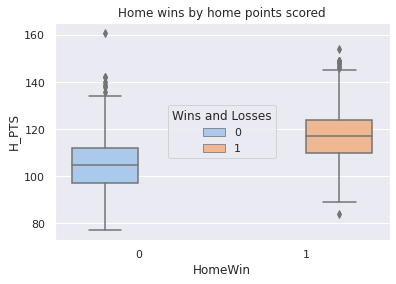

In [ ]:
sns.boxplot(x='HomeWin',y='H_PTS',hue='HomeWin',data=df_win_lose,palette='pastel')
plt.legend(loc='center',title='Wins and Losses')
plt.title('Home wins by home points scored')

We can see from the above boxplot that the average score between 115 and 125 typically resulted in a home team win, with a mean of 120. The home team typically loss if they scored between 100 and 115, with a mean of 110.

A couple of interesting outliers observed was a home team scored 160 points in a game and still loss. Also a team scored lowed that 90 points and still eneded up winning a game.

Text(0.5, 1.0, 'Home wins by visitor points scored')

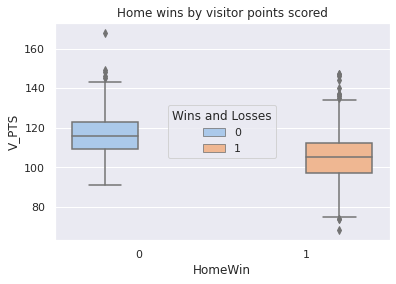

In [ ]:
sns.boxplot(x='HomeWin',y='V_PTS',hue='HomeWin',data=df_win_lose,palette='pastel')
plt.legend(loc='center',title='Wins and Losses')
plt.title('Home wins by visitor points scored')

Here, the amount visitors typically resulted in a win for them was between 115 points and 125, with a mean of about 118. The home team usually won if the visiting team scored 100 and 115, with a mean of 110.

***Violin plot***


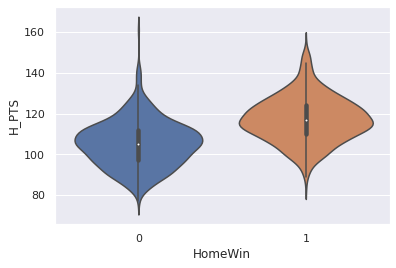

In [ ]:
# # Home wins by amount home points scored
sns.violinplot(y='H_PTS',x='HomeWin',data=df_win_lose,)

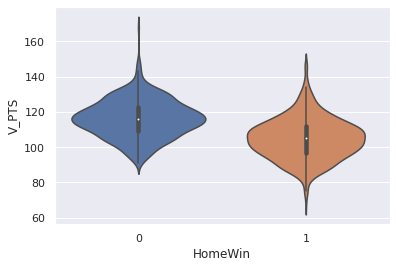

In [ ]:
# Home wins by amount visting points scored
sns.violinplot(y='V_PTS',x='HomeWin',data=df_win_lose)

Both of these violin plots help reinforce the amount of points typically scored in wins and losses.

***Final preprocessing and cleaning***

After exploring the data more in depth, there are a few more features we will no use for the models used in predicting wins and losses.

In [ ]:
# Drop unused features and row - League Average
df_misc.drop(index=30,columns=['Rk','Age','PW','PL','MOV','SOS','SRS','NRtg','Pace','FTr','3PAr','TS%','eFG%','TOV%','ORB%','FT/FGA','eFG%.1','TOV%.1','DRB%','FT/FGA.1','Arena','Attend.','Attend./G'])

,Team,W,L,ORtg,DRtg
0,Milwaukee Bucks*,60.0,22.0,113.8,105.2
1,Golden State Warriors*,57.0,25.0,115.9,109.5
2,Toronto Raptors*,58.0,24.0,113.1,107.1
3,Utah Jazz*,50.0,32.0,110.9,105.7
4,Houston Rockets*,53.0,29.0,115.5,110.7
5,Portland Trail Blazers*,53.0,29.0,114.7,110.5
6,Denver Nuggets*,54.0,28.0,113.0,108.9
7,Boston Celtics*,49.0,33.0,112.2,107.8
8,Oklahoma City Thunder*,49.0,33.0,110.3,107.0
9,Indiana Pacers*,48.0,34.0,109.9,106.5


#MACHINE LEARNING & PREDICTIONS

**Misc. Stats dataset predictions:**

**First Approach - KNN**

*KNeighborsClassifier*

In [ ]:
# Classification : Predict whether a team wins or losses

# Select predictor and target variable(s)
predictors = ['ORtg','DRtg']
target = 'W'
X = df_misc[predictors].values
y = (df_misc[target] == 'YES').values.astype(int)

# Test/Train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# Confirm split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (21, 2)
Training Labels Shape: (21,)
Testing Features Shape: (10, 2)
Testing Labels Shape: (10,)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# View scaled data
print(X_train[:10,:])

[[ 1.30360836  0.19934887]
 [-0.65180418 -0.30456078]
 [-0.2058329  -1.15733095]
 [-0.44597128 -0.11074937]
 [ 0.06861097  1.51726642]
 [ 0.17152742  1.01335677]
 [ 1.71527416 -0.18827394]
 [-0.17152742  0.16058659]
 [ 0.72041515 -0.42084762]
 [ 1.57805222  0.27687343]]


The accuarcy seems interesting, as the predicitons is seen as 100% accurate. All outcomes seem to come out as loses, but match the original test set perfectly.This could be a result from the small data set, possibly would be affected if more than one season was used to help develop more elaborate predictors.

In [ ]:
# Build classifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

# Make predictions
predictions = clf.predict(X_test)

# Compare predictions with correct values
print("Predictions:\n",predictions[:10],'\n\n')
print("Original:\n",y_test[:10],'\n\n')

# Compute accuracy
accuracy = (predictions == y_test).mean()
print('Accuracy: {0:.3f}'.format(accuracy),"\n\n")


Predictions:
 [0 0 0 0 0 0 0 0 0 0] 


Original:
 [0 0 0 0 0 0 0 0 0 0] 


Accuracy: 1.000 




The same thing occurs even when changing the value of K. Unsure if this is due to our dataset or the values assinged to our test and training set.

In [ ]:
# Computer using a value of k=9 instead of the default value
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = (predictions == y_test).mean()
print('Accuracy: {0:.3f}'.format(accuracy))

Accuracy: 1.000


*KNeighborsRegressor*

In [ ]:
# Regression : Predict whether team wins or losses

# Select predictor and target variable(s)
predictors = ['ORtg','DRtg']
target = 'W'
X = df_misc[predictors].values
y = (df_misc[target] == 'YES').values.astype(int)

# Test/Train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Confirm split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (23, 2)
Training Labels Shape: (23,)
Testing Features Shape: (8, 2)
Testing Labels Shape: (8,)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# View scaled data
print(X_train[:10,:])

[[ 0.46812119  0.55818808]
 [ 0.94664508 -2.13786035]
 [ 1.5277098   0.21583272]
 [-0.69400825 -0.42608357]
 [ 1.25426758  0.13024389]
 [-0.72818852 -0.89682218]
 [ 0.63902258  0.42980482]
 [-1.10417158 -0.29770031]
 [ 1.66443091 -0.29770031]
 [ 0.70738314 -1.32476638]]


In [ ]:
# Build KNN Regressor
regr = KNeighborsRegressor()
regr.fit(X_train,y_train)

# Make predictions
predictions = regr.predict(X_test)

# compare first ten predictions with first ten correct values
print(predictions[:10].astype(int))
print(y_test[:10])

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]


In [ ]:
# compute Mean Squared Error of predictions
mse = ((predictions - y_test)**2).mean()
print('MSE: {0:.0f}'.format(mse))

rmse = np.sqrt(((regr.predict(X_test) - y_test)**2).mean())
print("RMSE: {:.2f}".format(rmse))

MSE: 0
RMSE: 0.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Absolute difference between prediction and actual value')

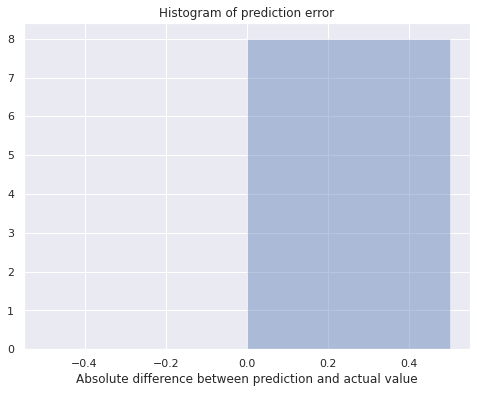

In [ ]:
# plot absolute prediction error as a histogram
plt.figure(figsize=(8,6))
sns.distplot(predictions - y_test, kde=False)
plt.title('Histogram of prediction error')
plt.xlabel('Absolute difference between prediction and actual value')

*Anamoly Detection*

In [ ]:
# compute distance between two n-dimensional point
def edist(x,y):    
  return np.sqrt(np.sum((x-y)**2))

# return a distance matrix based on columns of float matrix x
def dist(x):    
  m = x.shape[0]    
  dm = np.zeros((m,m))    
  for i in range(m):        
    for j in range(i,m):            
      dm[i,j] = edist(x[i,:], x[j,:])            
      dm[j,i] = dm[i,j]    
  return dm

# return indexes of anomalous elements of data frame df
def knn_anomalies(df_misc, k=3, threshold=3):
  # scale the data and compute distance matrix    
  x = df_misc.apply(zscore).values    
  dm = dist(x)

  sorted_distances = np.apply_along_axis(np.sort, 1, dm)
  dist_to_k_nearest = sorted_distances[:,k]

  dist_std = np.std(dist_to_k_nearest)
  dist_mean = np.mean(dist_to_k_nearest)
  dist_scaled = (dist_to_k_nearest - dist_mean)/dist_std

  anomaly_indexes = np.where(dist_scaled > threshold)    
  return anomaly_indexes

In [ ]:
features = ['ORtg','DRtg']
anoms = knn_anomalies(df_misc[features],k=7,threshold=6)

# add new 'Anomaly' column
x = np.full(len(df_misc), False)
x[anoms] = True
df_misc['Anomaly'] = x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


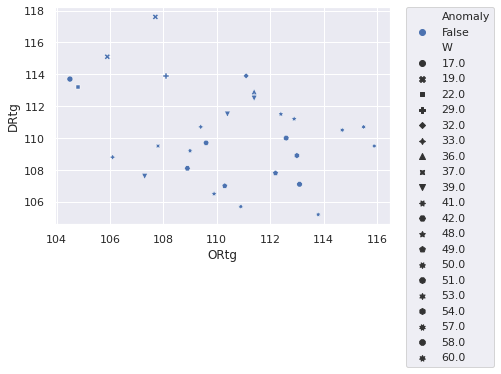

In [ ]:
# plot showing anomalies
sns.scatterplot('ORtg', 'DRtg', data=df_misc, hue='Anomaly', style='W')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


This data anamoly shows the inconsistencies and possible redundancies with our dataset.

**Second Approach - LinearRegression**


In [ ]:
# Build linear model with offensive rating as the single predictor variable, and team wins as the target variable.
X = df_misc[['ORtg']].values
y = (df_misc['W'] == 'YES').values.astype(int)

reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Scatterplot used with one predictor.

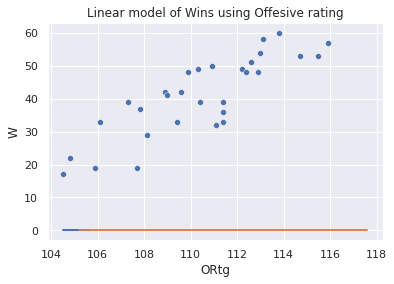

In [ ]:
# Create scatterpplot
scatter = sns.scatterplot(data=df_misc, x="ORtg", y="W")
predictions = reg.predict(X)
plt.title("Linear model of Wins using Offesive rating")
plt.plot(X, predictions)
plt.show(scatter)

Could not conclude the linear model appeared as a flat straight line rather than fitting to the scatterplot. This could be due to the predictor, and also could be due to amount of data in the dataset.

Expection was for the Offensive rating predictor to have a direct correlation on the results of wins and losses.

Coefficients of the model

In [ ]:
print("Intercept: {:.2f}".format(reg.intercept_))
print("Coefficient of mileage: {:.2f}".format(reg.coef_[0]))
print("R-squared value: {:.2f}".format(reg.score(X,y)))

Intercept: 0.00
Coefficient of mileage: -0.00
R-squared value: 1.00


Now let add in the Defensive team rating and see how it affect our predictions outcome.

In [ ]:
X = df_misc[['ORtg','DRtg']].values
y = (df_misc['W'] == 'YES').values.astype(int)

reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept: {:.2f}".format(reg2.intercept_))
print("Coefficient of Offensive rating: {:.2f}".format(reg2.coef_[0]))
print("Coefficient of Defensive rating: {:.2f}".format(reg2.coef_[1]))

Intercept: 0.00
Coefficient of Offensive rating: 0.00
Coefficient of Defensive rating: 0.00


It is strange that we are not getting values for our coefficients, this could be due to our test/train sets. This will be tested to determine the reason for these results.

In [ ]:
games = [1000,1]
est = reg2.predict([games])
print("Predicted wins: {:.2f}".format(est[0]))

Predicted wins: 0.00


In [ ]:
def plot_actual_predicted(actual, predicted, title):
    # YOUR CODE HERE
    scatter = sns.scatterplot(x=actual, y=predicted)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    p1 = [predicted.min(), predicted.max()]
    p2 = [predicted.min(), predicted.max()]
    plt.plot(p1, p2, color="black", linestyle="dashed", linewidth=2)
    plt.show(scatter)

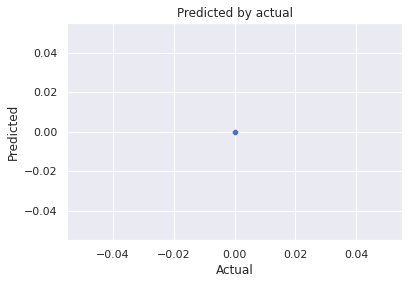

In [ ]:
# plot predicted vs. actual for our linear model
plot_actual_predicted(y, reg2.predict(X), 'Predicted by actual')

**Conclusion for Misc Stats Dataset**

It is safe to conclude that this dataset may not provide enough data to accuratly predict wins and losses. The amount of data should have a direct affect on these outcomes, but for now they are not producing the expected predictions. This could also be the way the predictor values are being interpreted, as I was hoping to show that either defensive or offensive rating has a direct effect on the outcome of a game.

**Wins & Losses dataset predictions:**

***First Approach - KNN***

*KNeighborsClassifier*

In [ ]:
# Classification : Predict whether a team wins or losses

# Select predictor and target variable(s)
predictors = ['H_PTS','V_PTS']
target = 'HomeWin'
X = df_win_lose[predictors].values
y = (df_win_lose[target] == 'True').values.astype(int)

# Test/Train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# Confirm split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (918, 2)
Training Labels Shape: (918,)
Testing Features Shape: (394, 2)
Testing Labels Shape: (394,)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# View scaled data
print(X_train[:10,:])

[[-0.74340546  2.05758058]
 [-0.42620991 -0.03935936]
 [-0.18831326 -0.68457164]
 [-1.69499208 -0.44261703]
 [-0.74340546 -0.28131396]
 [ 0.0495834   1.08976215]
 [ 0.6046756   1.08976215]
 [ 0.0495834   0.767156  ]
 [-1.29849766 -1.89434468]
 [ 0.52537671 -0.52326857]]


In [ ]:
# Build classifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

# Make predictions
predictions = clf.predict(X_test)

# Compare predictions with correct values
print("Predictions:\n",predictions[:10],'\n\n')
print("Original:\n",y_test[:10],'\n\n')

# Compute accuracy
accuracy = (predictions == y_test).mean()
print('Accuracy: {0:.3f}'.format(accuracy),"\n\n")

Predictions:
 [0 0 0 0 0 0 0 0 0 0] 


Original:
 [0 0 0 0 0 0 0 0 0 0] 


Accuracy: 1.000 




In [ ]:
# Computer using a value of k=9 instead of the default value
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = (predictions == y_test).mean()
print('Accuracy: {0:.3f}'.format(accuracy))

Accuracy: 1.000


*KNeighborsRegressor*

In [ ]:
# Regression : Predict whether team wins or losses

# Select predictor and target variable(s)
predictors = ['H_PTS','V_PTS']
target = 'HomeWin'
X = df_win_lose[predictors].values
y = (df_win_lose[target] == 'YES').values.astype(int)

# Test/Train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Confirm split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (984, 2)
Training Labels Shape: (984,)
Testing Features Shape: (328, 2)
Testing Labels Shape: (328,)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# View scaled data
print(X_train[:10,:])

[[ 0.03271681  1.07482867]
 [ 0.67179067  0.75377489]
 [-0.60635704 -0.53044022]
 [-1.56496783 -2.77781667]
 [-1.0057782  -0.851494  ]
 [ 0.43213798  0.19193078]
 [-0.12705165 -0.61070367]
 [ 0.9913276   0.43272111]
 [-0.68624128 -0.129123  ]
 [ 0.35225374  0.11166733]]


In [ ]:
# Build KNN Regressor
regr = KNeighborsRegressor()
regr.fit(X_train,y_train)

# Make predictions
predictions = regr.predict(X_test)

# compare first ten predictions with first ten correct values
print(predictions[:10].astype(int))
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# compute Mean Squared Error of predictions
mse = ((predictions - y_test)**2).mean()
print('MSE: {0:.0f}'.format(mse))
rmse = np.sqrt(((regr.predict(X_test) - y_test)**2).mean())
print("RMSE: {:.2f}".format(rmse))

MSE: 0
RMSE: 0.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Absolute difference between prediction and actual value')

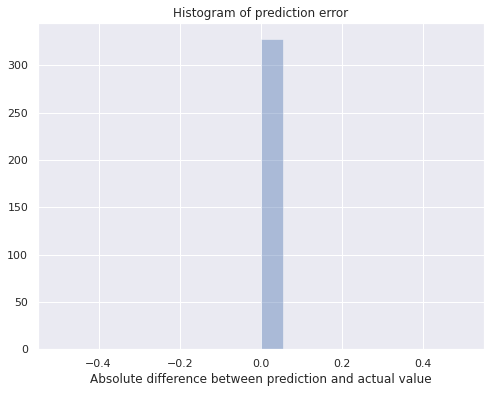

In [ ]:
# plot absolute prediction error as a histogram
plt.figure(figsize=(8,6))
sns.distplot(predictions - y_test, kde=False)
plt.title('Histogram of prediction error')
plt.xlabel('Absolute difference between prediction and actual value')

*Anamoly Detection*

In [ ]:
# compute distance between two n-dimensional point
def edist(x,y):    
  return np.sqrt(np.sum((x-y)**2))

# return a distance matrix based on columns of float matrix x
def dist(x):    
  m = x.shape[0]    
  dm = np.zeros((m,m))    
  for i in range(m):        
    for j in range(i,m):            
      dm[i,j] = edist(x[i,:], x[j,:])            
      dm[j,i] = dm[i,j]    
  return dm

# return indexes of anomalous elements of data frame df
def knn_anomalies(df_win_lose, k=3, threshold=3):
  # scale the data and compute distance matrix    
  x = df_win_lose.apply(zscore).values    
  dm = dist(x)

  sorted_distances = np.apply_along_axis(np.sort, 1, dm)
  dist_to_k_nearest = sorted_distances[:,k]

  dist_std = np.std(dist_to_k_nearest)
  dist_mean = np.mean(dist_to_k_nearest)
  dist_scaled = (dist_to_k_nearest - dist_mean)/dist_std

  anomaly_indexes = np.where(dist_scaled > threshold)    
  return anomaly_indexes

In [ ]:
features = ['H_PTS','V_PTS']
anoms = knn_anomalies(df_win_lose[features],k=7,threshold=6)

# add new 'Anomaly' column
x = np.full(len(df_win_lose), False)
x[anoms] = True
df_win_lose['Anomaly'] = x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


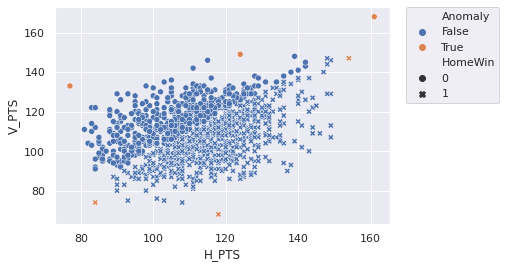

In [ ]:
# plot the colleges, showing anomalies
sns.scatterplot('H_PTS', 'V_PTS', data=df_win_lose, hue='Anomaly', style='HomeWin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

This data anamoly shows the inconsistencies and possible redundancies with our dataset. 

**Second Approach - LinearRegression**

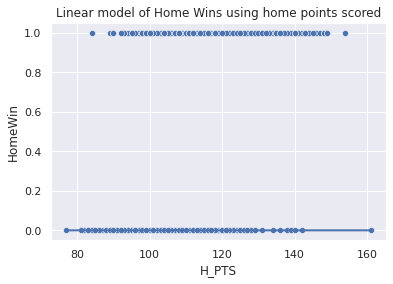

In [ ]:
X = df_win_lose[['H_PTS']].values
y = (df_win_lose['HomeWin'] == 'YES').values.astype(int)

reg = LinearRegression()
reg.fit(X,y)

scatter = sns.scatterplot(data=df_win_lose, x="H_PTS", y="HomeWin")
predictions = reg.predict(X)
plt.title("Linear model of Home Wins using home points scored")
plt.plot(X, predictions)
plt.show(scatter)

Here we can see the linear model goes through our dataset, but cannot help feel like this is not the best variables to display this type of regression. The model has all the datapoints related to losses.

In [ ]:
print("Intercept: {:.2f}".format(reg.intercept_))
print("Coefficient of mileage: {:.2f}".format(reg.coef_[0]))
print("R-squared value: {:.2f}".format(reg.score(X,y)))

Intercept: 0.00
Coefficient of mileage: 0.00
R-squared value: 1.00


In [ ]:
X = df_win_lose[['H_PTS','V_PTS']].values
y = (df_win_lose['HomeWin'] == 'YES').values.astype(int)

reg2 = LinearRegression()
reg2.fit(X,y)

print("Intercept: {:.2f}".format(reg2.intercept_))
print("Coefficient of Offensive rating: {:.2f}".format(reg2.coef_[0]))
print("Coefficient of Defensive rating: {:.2f}".format(reg2.coef_[1]))

Intercept: 0.00
Coefficient of Offensive rating: 0.00
Coefficient of Defensive rating: 0.00


It is strange that we are not getting values for our coefficients, this could be due to our test/train sets. This will be tested to determine the reason for these results.

In [ ]:
games = [1000,1]
est = reg2.predict([games])
print("Predicted wins: {:.2f}".format(est[0]))

Predicted wins: 0.00


**Conclusion for Wins & Losses Dataset**

It is safe to conclude that this dataset may not provide enough data to accuratly predict wins and losses. The amount of data should have a direct affect on these outcomes, but for now they are not producing the expected predictions. This could also be the way the predictor values are being interpreted, as I was hoping to show that either previous team wins have an affect on the outcome of the next games' outcome.

# Summary


Overall this was a semi-succesful look into whether certain dataset features could have an affect on the outcome of a game between two teams.


During the data exploration and visulization, we were able to determine represent the relationships we were looking to test. In regards to the Misc. Stats dataset, we were able to see how good offensive and defensive rating would result in a better win/loss record. With more time permitted, an intriguing feature that would have been interesting to explore if it affected wins/losses was whether the amount possessions a team had resulted in more wins. Next was the wins & losses dataset, where we wanted to correlate whether the Home team won if they scored more points. The relation should this to be true but there were still a few interesting outliers, where the home team scored a lot but still ended up losing. The feature we would want to test next, is whether a previous win would result in better chances to win the next game. Overall the data exploration and visualization yield promising results.


The machine learning/prediciton is where the datasets came into question. There was 100% accuracy for both dataset when it came to predicting. Not to think that this is not possible, but it did not predict any team wins in the end results. This could be attributed to a wide varity of things such as dataset size, predictor values, also the training and test sets could be a reason. This was the most confusing part, as there were anomolies that were able to be accounted for but we could not determine the reason for such a high accuracy when predicting.

Overall the report yield desired results, but maybe with more precise predictors/variables we would produce better predictions. For future work on these datasets, we would hope to provide better predictions and hopefully implement individual player efficiency datasets and determine whether a single player can have a overwhelming influence on the outcome of a game.